In [ ]:
#!wget https://services.healthtech.dtu.dk/download/92b94833-7812-491b-ac18-1f7aafea08a5/signalp-6.0h.fast.tar.gz -O /content/signalp-6-package.tar.gz
#!tar -xvzf /content/signalp-6-package.tar.gz

In [ ]:
import pandas as pd

# Define paths for the test set and benchmarking set
test_tsv_path = '/content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/test.tsv'
benchmarking_tsv_path = '/content/drive/MyDrive/LB2/benchmarking.tsv'
test_prediction_results_path = '/content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/output/prediction_results.txt'
benchmarking_prediction_results_path = '/content/drive/MyDrive/LB2/benchmarking_output/prediction_results.txt'

# Function to inspect a TSV/CSV file
def inspect_file(file_path, sep='\t', num_lines=5):
    df = pd.read_csv(file_path, sep=sep)
    print(f"File: {file_path}")
    print("Columns:", df.columns)
    print(f"First {num_lines} lines:\n", df.head(num_lines))
    print("\n")

# Function to inspect a text file
def inspect_text_file(file_path, num_lines=5):
    print(f"File: {file_path}")
    with open(file_path, 'r') as file:
        for i in range(num_lines):
            line = file.readline().strip()
            if line:
                print(line)
            else:
                break
    print("\n")

# Inspect the test and benchmarking TSV files
inspect_file(test_tsv_path, sep='\t')
inspect_file(benchmarking_tsv_path, sep=',')

# Inspect the first few lines of the SignalP prediction results
inspect_text_file(test_prediction_results_path, num_lines=10)
inspect_text_file(benchmarking_prediction_results_path, num_lines=10)


File: /content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/test.tsv
Columns: Index(['Sequence', 'Label'], dtype='object')
First 5 lines:
                                             Sequence  Label
0  MEHWGQPIPGAGQPWRQPLPTSGRWWLGAASWWWLGAASWWWLGAA...      0
1  MGFVLICTCPPSSGVVVSQLHHHQFSAGVKSNELWFRPTRRTLISK...      0
2  MSQNSDTFDSGLQMEVHKMAEADNSSVQQKFDAIRDYIGRKETTII...      0
3  MKVAIIILSLALVAAVFADQNCDIGNITSQCQMQHKNCEDANGCDT...      1
4  MDNFQYSVQLSDREWAEFSATADECGLLQADLASGDEPLSSDIDQG...      0


File: /content/drive/MyDrive/LB2/benchmarking.tsv
Columns: Index(['Entry', 'Length', 'label'], dtype='object')
First 5 lines:
     Entry  Length  label
0  Q9VCU5     323      0
1  Q8K2H6     185      0
2  Q9LKA0     259      0
3  Q501D2     572      0
4  Q06811    1365      0


File: /content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/output/prediction_results.txt
# SignalP-6.0	Organism: Other	Timestamp: 20240715112257
# ID	Prediction	OTHER	SP

In [ ]:
#test

!signalp6 --fastafile /content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/test_sequences.fasta --organism other --output_dir /content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/output --format txt --mode fast


#benchmarking

!signalp6 --fastafile /content/drive/MyDrive/LB2/benchmarking.fasta --organism other --output_dir /content/drive/MyDrive/LB2/benchmarking_output --format txt --mode fast

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define paths for the test set
test_tsv_path = '/content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/test.tsv'
test_prediction_results_path = '/content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/output/prediction_results.txt'
test_output_csv_path = '/content/drive/MyDrive/LB2/second_try/SVM/cross_validation/train123_val4_test5/output/merged_test_results.csv'

# Define paths for the benchmarking set
benchmarking_tsv_path = '/content/drive/MyDrive/LB2/benchmarking.tsv'
benchmarking_prediction_results_path = '/content/drive/MyDrive/LB2/benchmarking_output/prediction_results.txt'
benchmarking_output_csv_path = '/content/drive/MyDrive/LB2/benchmarking_output/merged_results.csv'

# Load the test.tsv file
test_df = pd.read_csv(test_tsv_path, sep='\t')
print("Test DataFrame Columns:", test_df.columns)

# Load the benchmarking.tsv file
benchmarking_df = pd.read_csv(benchmarking_tsv_path, sep=',')
print("Benchmarking DataFrame Columns:", benchmarking_df.columns)

# Function to parse SignalP results
def parse_signalp_results(file_path, is_benchmarking=False):
    results = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):
                parts = line.strip().split('\t')
                if is_benchmarking:
                    entry_id = parts[0].split('|')[1]  # Extract entry ID from the format sp|ENTRY|...
                else:
                    entry_id = int(parts[0])  # For test set, use integer index
                prediction = parts[1]
                binary_prediction = 0 if prediction == 'OTHER' else 1
                results.append((entry_id, binary_prediction))
    return pd.DataFrame(results, columns=['Entry', 'Binary_Prediction'])

# Parse SignalP results for the test set
test_signalp_df = parse_signalp_results(test_prediction_results_path)
test_merged_df = test_df.merge(test_signalp_df, left_index=True, right_on='Entry')

# Evaluate model performance for the test set
test_accuracy = accuracy_score(test_merged_df['Label'], test_merged_df['Binary_Prediction'])
test_precision = precision_score(test_merged_df['Label'], test_merged_df['Binary_Prediction'])
test_recall = recall_score(test_merged_df['Label'], test_merged_df['Binary_Prediction'])
test_f1 = f1_score(test_merged_df['Label'], test_merged_df['Binary_Prediction'])

print('Test Set Performance:')
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1 Score: {test_f1}')

# Parse SignalP results for the benchmarking set
benchmarking_signalp_df = parse_signalp_results(benchmarking_prediction_results_path, is_benchmarking=True)
benchmarking_merged_df = benchmarking_df.merge(benchmarking_signalp_df, on='Entry')

# Evaluate model performance for the benchmarking set
benchmarking_accuracy = accuracy_score(benchmarking_merged_df['label'], benchmarking_merged_df['Binary_Prediction'])
benchmarking_precision = precision_score(benchmarking_merged_df['label'], benchmarking_merged_df['Binary_Prediction'])
benchmarking_recall = recall_score(benchmarking_merged_df['label'], benchmarking_merged_df['Binary_Prediction'])
benchmarking_f1 = f1_score(benchmarking_merged_df['label'], benchmarking_merged_df['Binary_Prediction'])

print('Benchmarking Set Performance:')
print(f'Accuracy: {benchmarking_accuracy}')
print(f'Precision: {benchmarking_precision}')
print(f'Recall: {benchmarking_recall}')
print(f'F1 Score: {benchmarking_f1}')

# Save the merged results for further analysis if needed
test_merged_df.to_csv(test_output_csv_path, index=False)
benchmarking_merged_df.to_csv(benchmarking_output_csv_path, index=False)


Test DataFrame Columns: Index(['Sequence', 'Label'], dtype='object')
Benchmarking DataFrame Columns: Index(['Entry', 'Length', 'label'], dtype='object')
Test Set Performance:
Accuracy: 0.9929203539823008
Precision: 0.9661016949152542
Recall: 0.9661016949152542
F1 Score: 0.9661016949152542
Benchmarking Set Performance:
Accuracy: 0.9885869565217391
Precision: 0.9426751592356688
Recall: 0.925
F1 Score: 0.9337539432176656


Confusion Matrix (Test Set) - True Positives (TP): 171
Confusion Matrix (Test Set) - True Negatives (TN): 1512
Confusion Matrix (Test Set) - False Positives (FP): 6
Confusion Matrix (Test Set) - False Negatives (FN): 6
Confusion Matrix (Benchmarking Set) - True Positives (TP): 148
Confusion Matrix (Benchmarking Set) - True Negatives (TN): 1671
Confusion Matrix (Benchmarking Set) - False Positives (FP): 9
Confusion Matrix (Benchmarking Set) - False Negatives (FN): 12


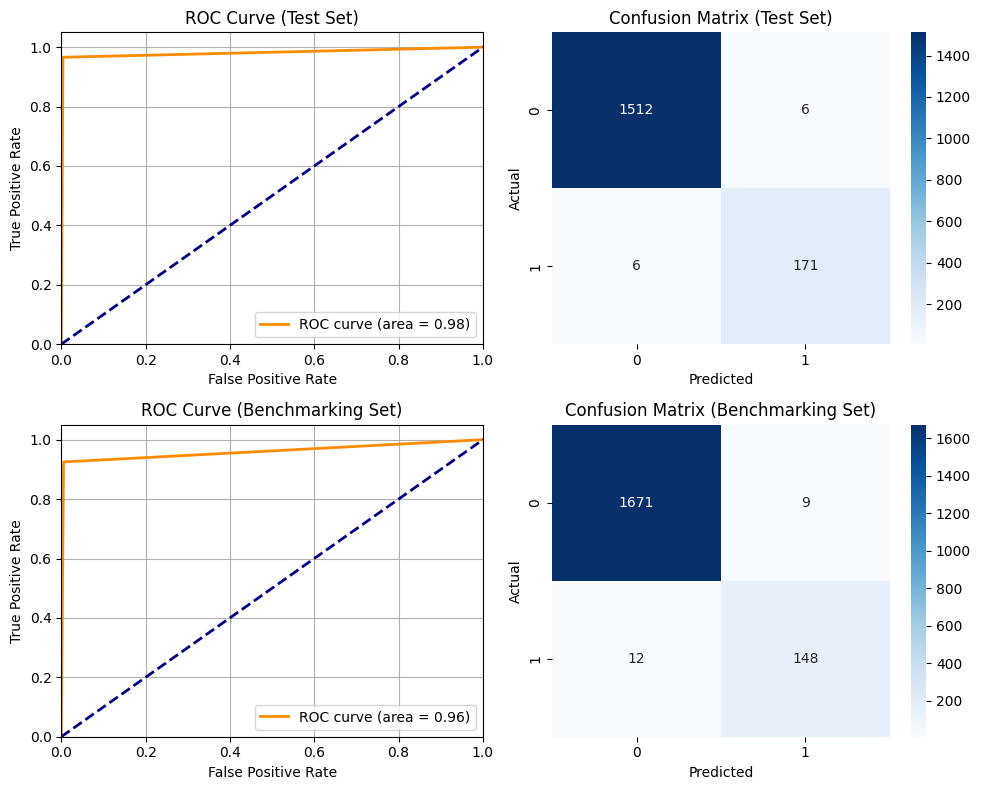

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(y_true, y_pred, ax, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)
    tn, fp, fn, tp = cm.ravel()
    print(f'{title} - True Positives (TP): {tp}')
    print(f'{title} - True Negatives (TN): {tn}')
    print(f'{title} - False Positives (FP): {fp}')
    print(f'{title} - False Negatives (FN): {fn}')

def plot_roc_curve(y_true, y_scores, ax, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')
    ax.grid(True)

# Evaluate predictions
test_y_true = test_merged_df['Label']
test_y_pred = test_merged_df['Binary_Prediction']
benchmarking_y_true = benchmarking_merged_df['label']
benchmarking_y_pred = benchmarking_merged_df['Binary_Prediction']

# Placeholder for probabilities since SignalP doesn't provide them
test_y_scores = test_y_pred  # Replace with actual probabilities if available
benchmarking_y_scores = benchmarking_y_pred  # Replace with actual probabilities if available

# Create subplots for visualizations
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Test set visualizations
plot_roc_curve(test_y_true, test_y_scores, ax=axes[0, 0], title='ROC Curve (Test Set)')
plot_confusion_matrix(test_y_true, test_y_pred, ax=axes[0, 1], title='Confusion Matrix (Test Set)')

# Benchmarking set visualizations
plot_roc_curve(benchmarking_y_true, benchmarking_y_scores, ax=axes[1, 0], title='ROC Curve (Benchmarking Set)')
plot_confusion_matrix(benchmarking_y_true, benchmarking_y_pred, ax=axes[1, 1], title='Confusion Matrix (Benchmarking Set)')

# Adjust layout
plt.tight_layout()
plt.show()
